In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

     |████████████████████████████████| 378kB 8.0MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 516.2MB 30kB/s 
     |████████████████████████████████| 3.0MB 45.5MB/s 
     |████████████████████████████████| 460kB 78.1MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


#**Before Start**

In [ ]:
!pip install ar_wordcloud
!pip install arabic-reshaper
!pip install python-bidi
!pip install --upgrade tqdm

     |████████████████████████████████| 368kB 14.5MB/s 
  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.0-cp36-none-any.whl size=16501 sha256=4e5589aff53861103de9ae8697a5554b471523a5a9c113f179d8dfb1bf6b53cb
  Stored in directory: /root/.cache/pip/wheels/a9/e6/ec/2ba48138d4447d40442dd6ba3bf6b92d9c6afd74e9c720c6fe
Successfully built arabic-reshaper
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0
     |████████████████████████████████| 71kB 4.6MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4786675712034616301, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10719817841780098687
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10904900510228115170
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15788201792
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2506053281235892304
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!cat /proc/meminfo

MemTotal:       26751688 kB
MemFree:        14764292 kB
MemAvailable:   25511372 kB
Buffers:          159500 kB
Cached:         10506168 kB
SwapCached:            0 kB
Active:          1011240 kB
Inactive:       10223156 kB
Active(anon):     460128 kB
Inactive(anon):     8600 kB
Active(file):     551112 kB
Inactive(file): 10214556 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             20464 kB
Writeback:             0 kB
AnonPages:        568840 kB
Mapped:           450944 kB
Shmem:              9160 kB
Slab:             466128 kB
SReclaimable:     398428 kB
SUnreclaim:        67700 kB
KernelStack:        4448 kB
PageTables:         6708 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375844 kB
Committed_AS:    2947300 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1904 kB
AnonHugePages:   

In [ ]:
#link the notebook with drive to import files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/3-class.csv 3-class.csv

In [ ]:
!cp /content/drive/My\ Drive/NotoNaskhArabic-Regular.ttf NotoNaskhArabic-Regular.ttf

In [ ]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/stop_words.txt stop_words.txt

In [ ]:
#discover the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlinBackend.figure_format = 'retina'
df_original = pd.read_csv('3-class.csv')
df_original.head(10)

,Tweet,Polarity
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,neg
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,neg
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,neg
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,neg
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,neg
5,الاعلام اللبناني يهاجم السعوديه منذ مده بكل ق...,neg
6,البرنامج استاجر بعض المشاهير و الهوامير في تو...,neg
7,الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا...,neg
8,الخرج بيض الله وجه محافظ الخرج فهذه القناه تص...,neg
9,الرياض السعوديه رسالتي لوزير العمل في حينه عن...,neg


In [ ]:
#Discovering dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56674 entries, 0 to 56673
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     56674 non-null  object
 1   Polarity  56674 non-null  object
dtypes: object(2)
memory usage: 885.7+ KB


In [ ]:
#Discovering dataset if tweet column and polarity column are in the same size
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56674 entries, 0 to 56673
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     56674 non-null  object
 1   Polarity  56674 non-null  object
dtypes: object(2)
memory usage: 885.7+ KB


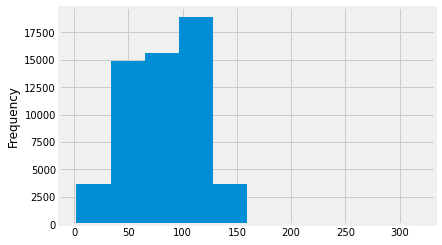

In [ ]:
#Discovering the tweets length
df_original['Tweet'].str.len().plot.hist()

In [ ]:
#Discovering the count of each class
df_original.Polarity.value_counts()

neg     20731
neut    18726
pos     17217
Name: Polarity, dtype: int64

In [ ]:
#Change class values from neg pos neut to 0 1 2
df_original['Polarity'] = df_original['Polarity'].map({'neg': 0, 'pos': 1, 'neut': 2})

In [ ]:
#check first 10 tweets with negative sentiment
df_original[df_original.Polarity == 0].head(10)

,Tweet,Polarity
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,0
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,0
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,0
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,0
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,0
5,الاعلام اللبناني يهاجم السعوديه منذ مده بكل ق...,0
6,البرنامج استاجر بعض المشاهير و الهوامير في تو...,0
7,الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا...,0
8,الخرج بيض الله وجه محافظ الخرج فهذه القناه تص...,0
9,الرياض السعوديه رسالتي لوزير العمل في حينه عن...,0


In [ ]:
#check the number of unique tweets (original:56674)
df_original['Tweet'].nunique()

55176

In [ ]:
#check the number of repeated tweets 
repeat=[]
list_of_tweets = df_original['Tweet'].to_list()
for i in range(len(list_of_tweets)-1):
  if list_of_tweets[i] in list_of_tweets[i+1:]:
    repeat.append(i)
len(repeat)

1498

In [ ]:
#drop the repeated tweets from dataset
df_original.drop(repeat,axis=0,inplace=True)
len(df_original)

55176

In [ ]:
#reset the index after dropping tweets
df_original.reset_index(drop=True, inplace=True)
df_original.head()

,Tweet,Polarity
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,0
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,0
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,0
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,0
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,0


In [ ]:
#check the dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     55176 non-null  object
 1   Polarity  55176 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.2+ KB


In [ ]:
#generate (original)column to compare the changes with (tweet) column
original = df_original['Tweet'].copy()
df_original['original'] = original
df_original.head()

,Tweet,Polarity,original
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,0,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,0,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,0,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,0,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...


In [ ]:
#save the csv just in case
df_original.to_csv('/content/drive/My Drive/Tweets_without_repeat.csv')

In [ ]:
#ignore
df_original['pre_clean_len'] = [len(t) for t in df_original.Tweet]

In [ ]:
#ignore
x = df_original.Tweet
y = df_original.Polarity

#**Preprocessing**

In [ ]:
# Data cleaning function definition

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [ ]:
#use regular expression for discard hashtag, numbers, english letters, symbols
#use the beautiful soup for decoding the HTML and removing emojis
import re
from bs4 import BeautifulSoup

pat1 = r'@[A-Za-z0-9_]+'#remove users
pat2 = r'https?://[^ ]+'#websites
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'#websites
arabic_num_pat = '[٠١٢٣٤٥٦٧٨٩]'#arabic numbers
eng_num_pat = '[0123456789]'#english numbers
sharta_pat = '[_]'
#sharta_pat = '_[أ-ي]+' #for removing hashtag
eng_pat = '[A-Za-z]'#any english letters

def tweet_cleaner(text):
  soup = BeautifulSoup(text, 'lxml')
  souped = soup.get_text()
  try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")#HTML encoding didnt decode properly so we decode it again
  except:
        bom_removed = souped
  stripped = re.sub(combined_pat, '', bom_removed)
  stripped = re.sub(www_pat, '', stripped)
  stripped = re.sub(arabic_num_pat, '', stripped)
  stripped = re.sub(eng_num_pat, '', stripped)
  #stripped = re.sub(r'\w+_\s?','_',stripped) #for removing hashtag
  stripped = re.sub(sharta_pat, ' ', stripped)
  stripped = re.sub(eng_pat, ' ', stripped)

  words = [x for x in tok.tokenize(stripped) if len(x) > 1]#tokenize the tweets to separate words for cleaning
  return (" ".join(words)).strip() #return cleaned tweets

##**auto-generated SW**

In [ ]:
clean_tweet_texts = []
for i in range(0, len(df_original)):
  if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed"%(i+1,len(df_original)))                                                                    
  clean_tweet_texts.append(tweet_cleaner(df_original['Tweet'][i])) #apply tweet_cleaner class to clean the dataset

Tweets 10000 of 55176 has been processed
Tweets 20000 of 55176 has been processed
Tweets 30000 of 55176 has been processed
Tweets 40000 of 55176 has been processed
Tweets 50000 of 55176 has been processed


In [ ]:
#save cleaned dataset just in case
clean_df = pd.DataFrame(clean_tweet_texts, columns=['text'])
clean_df['target'] = df_original.Polarity
clean_df['original'] = original
clean_df.to_csv('clean_tweet.csv', encoding='utf-8')

In [ ]:
csv = 'clean_tweet.csv'
df = pd.read_csv(csv, index_col=0)

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55175 entries, 0 to 55174
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      55175 non-null  object
 1   target    55175 non-null  int64 
 2   original  55175 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
df.head()

,text,target,original
0,ابراهيم عيسى الوسخ ابن الوسخه كلما حصل حادث ات...,0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...
1,اخطر حروب الارض حرب العقيده حسيبك الله اول ال ...,0,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال خ...,0,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...
3,اعلامنا متمثل في داوودالشريان روتانا وطقتهم كي...,0,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...
4,الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه ...,0,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...


In [ ]:
#specify variable for each column
x = df.text
y = df.target
z = df.original

In [ ]:
#discovering the most frequent words in the dataset (the order based on the total)
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(x)
neg_doc_matrix = cvec.transform(df[y ==0].text)
pos_doc_matrix = cvec.transform(df[y ==1].text)
neut_doc_matrix = cvec.transform(df[y ==2].text)

neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)
neut_tf = np.sum(neut_doc_matrix, axis=0)
word = cvec.get_feature_names()
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
neut = np.squeeze(np.asarray(neut_tf))

term_freq_df = pd.DataFrame([word, neg, pos, neut], columns= cvec.get_feature_names()).transpose()

term_freq_df.columns = ['word','negative', 'positive', 'neutral']
term_freq_df['total']=term_freq_df['negative'] + term_freq_df['positive'] + term_freq_df['neutral']
freq = term_freq_df.sort_values(by='total', ascending=False).iloc[:86024]

freq

,word,negative,positive,neutral,total
الهلال,الهلال,8173,9965,4609,22747
في,في,6348,4091,8040,18479
من,من,6404,3552,3671,13627
على,على,2911,2045,2216,7172
الاهلي,الاهلي,1563,3185,2041,6789
...,...,...,...,...,...
سوايا,سوايا,0,1,0,1
سوايرز,سوايرز,0,1,0,1
سوبببر,سوبببر,0,1,0,1
سوبرايز,سوبرايز,0,0,1,1


In [ ]:
#count the number of characters in one of tweets(to see the changes after removing autogenerated stopwords)
old_length= len(df['text'][0])
old_length

105

In [ ]:
df['text'][0]

'ابراهيم عيسى الوسخ ابن الوسخه كلما حصل حادث اتهم السعوديه بالارهاب الكلب كان براتب مليون جنيه من سنوي مصر'

In [ ]:
#put each column from the table in a list
words = freq['word'].to_list()
negative = freq['negative'].to_list()
positive = freq['positive'].to_list()
neutral = freq['neutral'].to_list()

final_labels = []

In [ ]:
#classify each word in the dataset to positive negative or neutral based on its occurence in the dataset
#
for i in range(len(words)):
    if (negative[i]-positive[i]>=5) and (negative[i]-neutral[i]>=5):#if the word repeated in negative tweets more than positive and neutral tweets (5 and more) then the word is negative regardless the actual classification
        final_labels.append('negative')
    elif (positive[i]-negative[i]>=5) and (positive[i]-neutral[i]>=5):#if the word repeated in positive tweets more than negative and neutral tweets (5 and more) then the word is positive regardless the actual classification
        final_labels.append('positive')
    elif (neutral[i]-positive[i]>=5) and (neutral[i]-negative[i]>=5):#if the word repeated in neutral tweets more than positive and negative tweets (5 and more) then the word is neutral regardless the actual classification
        final_labels.append('neutral')
    elif (positive[i]==0 and neutral[i]==0):#if the occurence or words for neutral and positive ara 0, then for sure the word is negative regardless the actual classification
        final_labels.append('negative')
    elif (neutral[i]==0 and negative[i]==0):#if the occurence or words for neutral and negative ara 0, then for sure the word is positive regardless the actual classification
        final_labels.append('positive')
    elif (positive[i]==0 and negative[i]==0):#if the occurence or words for positive and negative ara 0, then for sure the word is neutral regardless the actual classification
        final_labels.append('neutral')
    else:
        final_labels.append('null')#if non of these condition are met (means the same word are occured the same for three classes(or the difference are 4 or less)) then the word is null

In [ ]:
freq['Polarity'] = final_labels #check the labels for each word
final_labels[0:5]

['positive', 'neutral', 'negative', 'negative', 'positive']

In [ ]:
len(words) #count of all words in the dataset

86024

In [ ]:
len(final_labels)#the length of words (previos command) and final labels are same then no word is messing

86024

In [ ]:
freq_null=freq[freq['Polarity']=='null']#collect all words with null classification as noisy words because dont affect the tweets when we remove them

In [ ]:
null_words = freq_null['word'].to_list()#put null words to list

In [ ]:
len(null_words) #no. of null words

19883

In [ ]:
null_words[0]#sample of null word

'او'

In [ ]:
with open('null_words.txt', 'a', encoding='utf-8') as f: #save null words in text file to be used as stopwords
    for ele in null_words:
        f.write(ele+'\n')

with open('null_words.txt','r',encoding='utf-8') as f:
    list_of_words = f.readlines()
    
clean_list=[]
for ele in list_of_words:
    clean_list.append(ele.rstrip('\n'))

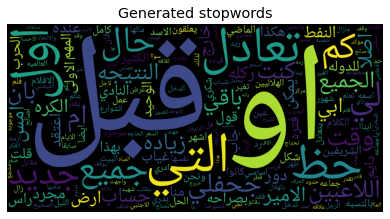

In [ ]:
#apply wordcloud for the null words, we can see that all words are nonsentimental so it will not affect the tweet if we remove them
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper 


f = open('null_words.txt', 'r', encoding='utf-8')
data = arabic_reshaper.reshape(f.read())
data = get_display(data) 
WordCloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', background_color='black',
                  mode='RGB', width=2000, height=1000).generate(data)
plt.title("Generated stopwords")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

In [ ]:
#apply stopword removal on the dataset
def remove_words(st):
    tokens=st.split()
    new = []
    for word in tokens:
        if word not in clean_list:
            new.append(word)
    return ' '.join(new)

df['text']=df['text'].apply(remove_words)

In [ ]:
#check the character length for one tweet (past:105)
new_length=len(df['text'][0])
new_length

84

In [ ]:
df['text'][0]#null words have removed

'ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعوديه بالارهاب الكلب كان مليون جنيه من مصر'

#complete process

In [ ]:
#normalization
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    words = [x for x in tok.tokenize(text) if len(x) > 1]
    return ("".join(text)).strip()

clean_tweet = []
for i in range(0, len(df)):
  if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed"%(i+1,len(df)))                                                                    
  clean_tweet.append(normalizeArabic(df['text'][i]))

    
#remove repeated letters more than 2 letters
import re
for i in range(len(clean_tweet)):
  clean_tweet[i] = re.sub(r'(.)\1+', r'\1\1', clean_tweet[i])

Tweets 10000 of 55175 has been processed
Tweets 20000 of 55175 has been processed
Tweets 30000 of 55175 has been processed
Tweets 40000 of 55175 has been processed
Tweets 50000 of 55175 has been processed


In [ ]:
clean_tweet[:10]

['ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعوديه بالارهاب الكلب كان مليون جنيه من مصر',
 'اخطر حروب الارض حرب حسيبك الله ال راه رب يده زا',
 'اصبحت عبر الخيريه لايصال خبثها اين من هذا نطالب خادم الحرمين',
 'متمثل في داوودالشريان روتانا كيف ترجي من هالاشكال خير همهم في الحياه المراه',
 'الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه قناه العهر مزجاه في',
 'الاعلام يهاجم السعوديه منذ مده بكل قبيح ومجموعه تدعم الاعلام في لبنان فيها',
 'استاجر بعض في تويتر عشان يبررو لهم ويرقعو برنامج اصرار',
 'الحمد لله ما من واحد فاشل اخلاقيا همه الشحاذه من علي مواطن يفضح برنامج الاصرار برعايه',
 'الخرج بيض الله وجه الخرج القناه علي المسلمين من المخالفات والمحرمات تدعو الي الرذيله وتشوه صوره الاسلام',
 'الرياض السعوديه لوزير العمل في عن برنامج اصرار برنامج بفكرته منسوخ بشكل مبتذل وفاشل']

In [ ]:
#save the csv
df = pd.DataFrame(clean_tweet, columns=['text'])
df['polarity'] = y
df['original'] = z
df.rename(columns={'polarity':'target'},inplace=True)
df.to_csv('clean_tweet.csv', encoding='utf-8')

In [ ]:
csv = 'clean_tweet.csv'
df = pd.read_csv(csv, index_col=0)

In [ ]:
df.info()#there are 15 tweets missing or blank

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55175 entries, 0 to 55174
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      55160 non-null  object
 1   target    55175 non-null  int64 
 2   original  55175 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df.head()

,text,target,original
0,ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعودي...,0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...
1,اخطر حروب الارض حرب حسيبك الله ال راه رب يده زا,0,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...
2,اصبحت عبر الخيريه لايصال خبثها اين من هذا نطال...,0,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...
3,متمثل في داوودالشريان روتانا كيف ترجي من هالاش...,0,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...
4,الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه ...,0,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...


In [ ]:
df.dropna(inplace=True) #remove all rows with missing tweets
df.reset_index(drop=True, inplace=True)#reset index after removing rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55160 entries, 0 to 55159
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      55160 non-null  object
 1   target    55160 non-null  int64 
 2   original  55160 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
df.head()

,text,target,original
0,ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعودي...,0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...
1,اخطر حروب الارض حرب حسيبك الله ال راه رب يده زا,0,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...
2,اصبحت عبر الخيريه لايصال خبثها اين من هذا نطال...,0,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...
3,متمثل في داوودالشريان روتانا كيف ترجي من هالاش...,0,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...
4,الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه ...,0,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...


In [ ]:
text = df['text'].copy()
target = df['target'].copy()
original = df['original'].copy()

#copy with 3 columns
df = pd.DataFrame(text, columns=['text'])
df['target'] = target
df['original'] = original
df.to_csv('/content/drive/My Drive/clean_tweet.csv', encoding='utf-8')

#copy with 2 columns
my_df = pd.DataFrame(text, columns=['text'])
my_df['target'] = target

my_df.head()

,text,target
0,ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعودي...,0
1,اخطر حروب الارض حرب حسيبك الله ال راه رب يده زا,0
2,اصبحت عبر الخيريه لايصال خبثها اين من هذا نطال...,0
3,متمثل في داوودالشريان روتانا كيف ترجي من هالاش...,0
4,الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه ...,0


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55160 entries, 0 to 55159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    55160 non-null  object
 1   target  55160 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.0+ KB


In [ ]:
x = my_df.text
y = my_df.target
z = df.original

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 666

#split the tweets to train, validation and test
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)#train:80%, validation:20%
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)#split the validation that we already have (20%) to validation:10%, test:10%

#ignore, we use this to save the original testing tweets after testing instead of cleaned one
x_train_original, x_validation_and_test_original, y_train_original, y_validation_and_test_original = train_test_split(z, y, test_size=.2, random_state=SEED)
x_validation_original, x_test_original, y_validation_original, y_test_original = train_test_split(x_validation_and_test_original, y_validation_and_test_original, test_size=.5, random_state=SEED)

In [ ]:
x_test[5500:5516]

2389     لو رجل بدال الكويك نت حقكم والله انها اشلا من ...
53765    رجال الحد الجنوبي اللهم اني اسالك بكل اسم به ن...
7215     الهلال هجر حديثوا الصداره الطحلبيه يصيحون ويسم...
9554     معقوله اداراه الهلال ماتشوف التحكيم ضد فريقها ...
10691    طيب ليش عن اخطاا الحكم الفاضحه ضد الهلال قدع ل...
27359    بالون اختبار يبدو ان كانت اكبر من المتوقع ان ه...
29709    تعليق الدراسه في القصيم تعليق الدراسه سنابييني...
1647     حذف قناه العربيه من الريسيفر مع الاسف قناتين م...
32249    اذا صحت التسريبات قرار رسوم الاراضي البيضاا ال...
37958            وزير الداخليه البلجيكي يرفض امن اسال اكثر
53838    رجال الحد الجنوبي ربي لاتحرم شهداءهم الجنه وان...
14883    خدع الضعفاا من سنوات بشعاراته الكاذبه وضيع مدخ...
3659     حين اهل الحق عن اهل انهم علي حق علي بن طالب رض...
29170    بعطي اجازه لنفسي شكرا تيتشر نور تعليق الدراسه ...
54830       باتريوت امان لقوي التحالف في اليمن عاصفه الحزم
40158    نزيدوا صبابتا ويزيدوا وصلا بطولات هي السحر امت...
Name: text, dtype: object

In [ ]:
x_test_original[5500:5516]

2389     لو اعلق رجل جدتي بدال الكويك نت حقكم والله انه...
53765     رجال_الحد_الجنوبي اللهم اني اسالك بكل اسم سمي...
7215      الهلال_هجر حديثوا الصداره الطحلبيه يصيحون ويس...
9554     معقوله اداراه الهلال ماتشوف التحكيم ضد فريقها ...
10691     طيب ليش ماتتكلم عن اخطاا الحكم الفاضحه ضد اله...
27359     بالون اختبار يبدو ان رده الفعل كانت اكبر من ا...
29709     تعليق_الدراسه_في_القصيم تعليق_الدراسه سنابيين...
1647      حذف_قناه_العربيه_من_الريسيفر مع الاسف نشاهد ق...
32249     اذا صحت التسريبات التي تخص قرار رسوم_الاراضي_...
37958     وزير الداخليه البلجيكي يرفض اتهام اجهزه امن ب...
53838     رجال_الحد_الجنوبي ربي لاتحرم شهدائهم الجنه وا...
14883     خدع الضعفاا من سنوات بشعاراته المزيفه الكاذبه...
3659      حين سكت اهل الحق عن الباطل توهم اهل الباطل ان...
29170    بعطي اجازه لنفسي شكرا تيتشر نور تعليق_الدراسه_...
54830    صواريخ باتريوت الاماراتيه توفر مظله امان لقوى ...
40158     نزيدوا صبابتا ويزيدوا وصلا بطولات هي السحر ال...
Name: original, dtype: object

In [ ]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 2]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 2]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 2]) / (len(x_test)*1.))*100))


Train set has total 44128 entries with 36.15% negative, 30.95% positive, 32.90% neutral
Validation set has total 5516 entries with 35.88% negative, 29.71% positive, 34.41% neutral
Test set has total 5516 entries with 36.40% negative, 29.88% positive, 33.72% neutral


In [ ]:
#converting the labels to categorical data

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(44128, 3)

In [ ]:
y_validation = to_categorical(y_validation)#the same for validation

In [ ]:
y_validation.shape

(5516, 3)

#**word to vector**

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils
from keras.preprocessing.text import Tokenizer

##**AraVec**

In [ ]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/full_uni_cbow_100_twitter.zip /content/

In [ ]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/full_uni_sg_100_twitter.zip /content/

In [ ]:
!unzip full_uni_cbow_100_twitter.zip

Archive:  full_uni_cbow_100_twitter.zip
  inflating: full_uni_cbow_100_twitter.mdl  
  inflating: full_uni_cbow_100_twitter.mdl.trainables.syn1neg.npy  
  inflating: full_uni_cbow_100_twitter.mdl.wv.vectors.npy  


In [ ]:
!unzip full_uni_sg_100_twitter.zip

Archive:  full_uni_sg_100_twitter.zip
  inflating: full_uni_sg_100_twitter.mdl  
  inflating: full_uni_sg_100_twitter.mdl.trainables.syn1neg.npy  
  inflating: full_uni_sg_100_twitter.mdl.wv.vectors.npy  


In [ ]:
from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('full_uni_cbow_100_twitter.mdl')#CBOW
model_ug_sg = KeyedVectors.load('full_uni_cbow_100_twitter.mdl')#SG

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
len(model_ug_cbow.wv.vocab.keys())#total vocabulary words in CBOW AraVec

1259756

In [ ]:
#generate embedding index from appending CBOW and SG (embedding matrix will be filled with embedding index )
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
  embeddings_index[w] = np.append(model_ug_cbow.wv[w], 
                                  model_ug_sg.wv[w])
print(f'Found {len(embeddings_index)} word vectors.')

Found 1259756 word vectors.


#**Pad Sequence**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000) #generate index with maximum 100000 words
tokenizer.fit_on_texts(x_train)#creates the vocabulary index based on word frequency 1 most frequent word, 2 second most frequent word and vice versa, 0 reserved for padding (word_index)
sequences = tokenizer.texts_to_sequences(x_train)#(Transforms each text in texts to a sequence of integers)takes each word in the text and replaces it with its corresponding integer value from the word_index

In [ ]:
len(tokenizer.word_index)#total no. of words in the word index (same as no. of training words)

54873

In [ ]:
#check first 5 tweets of training
for x in x_train[:5]:
  print(x)

رفع اسعار البنزين والكهرباا والقادم اجمل واصلي يابلادي السعوديه اليمن
تعليق الدراسه في القصيم المطر في المدينه الدراسه بالقصيم غلط
بكره عندي اوف ان شاالله تعليق الدراسه في الرياض
هذا اللي يلعب من قلبب هذا روح الهلال الله لنا كثر مانحبك الهلال
الهلال هجر خماسيه راءعه اجمل عوده الشلهوب القاءد


In [ ]:
length = []
for x in x_train:
  length.append(len(x.split()))

In [ ]:
#maximum words in the tweet for the training dataset
tweetlen= max(length)
tweetlen

28

In [ ]:
x_train_seq = pad_sequences(sequences, maxlen=tweetlen)# apply 0 index so all tweets have the same length (28)
print('Shape of data tensor: ', x_train_seq.shape)

Shape of data tensor:  (44128, 28)


In [ ]:
x_train_seq[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
           20,    21,    19,    24,   611,   180,  4913,  4317,     6,
           55],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            7,     8,     2,    12,   550,     2,   593,     8,   846,
         1218],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,   323,   308,  1315,    14,   916,     7,     8,     2,
           39],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    28,    40,   237,
            3, 14152,    28,   339,     1,     9,   160,   574, 14153,
            1],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0

In [ ]:
sequences_val = tokenizer.texts_to_sequences(x_validation) #same as training, generate sequence of integer and apply zero padding
x_val_seq = pad_sequences(sequences_val, maxlen=tweetlen)

In [ ]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200)) #AraVec (num_words=100000)(vector size (dimention)=200) (100000*200 matrix) (we add embedding index in embedding matrix)
#embedding_matrix = np.zeros((num_words, 300)) #ArabicNews & Fasttext

#for the words in the training dataset, 
for word, i in tokenizer.word_index.items(): # 54873
  if i >= num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
seed = 3

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.embeddings import Embedding

In [ ]:
sequences_test = tokenizer.texts_to_sequences(x_test)#same for testing
x_test_seq = pad_sequences(sequences_test, maxlen=tweetlen)
y_test = to_categorical(y_test)

In [ ]:
!pip install keras_metrics

In [ ]:
import keras
import keras_metrics
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import shutil

#**GRU with Auto-generated stopword**

##**1 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_gru")
keras_callbacks = [tensorboard]

In [ ]:
%%time

model_gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen #100000:max. no. of words, 200: vector size, (add weights to 100000*200 matrix) 
              , trainable=True)
model_gru.add(e)
model_gru.add(keras.layers.GRU(100, dropout=0.2))#100: no. of nodes, we drop 20% of the nodes to avoid overfitting
model_gru.add(Dense(3, activation='softmax'))#3 classes
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_gru.summary()
model_gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               90300     
_________________________________________________________________
dense_1 (Dense)              (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44128 samples, validate on 5516 samples
Epoch 1/5
44128/44128 [==============================] - 49s 1ms/step - loss: 0.6566 - accuracy: 0.7227 - precision: 0.7025 - recall: 0.6080 - f1_score: 0.6508 - val_loss: 0.5576 - val_accuracy: 0.7765 - val_precision: 0.8410 - val_recall: 0.7045 - val_f1_score: 0.7666
Epoch 2/5
44128/44128 [==============================] - 48s 1ms/step - loss: 0.4962 - accuracy: 0.8024 - precision: 0.8305 - recall: 0.7843 - f1_score: 0.8067 - val_loss: 0.5304 - val_accuracy: 0.7908 - val_precision: 0.8809 - val_recall: 0.6997 - val_f1_score: 0.7798
Epoch 3/5
44128/44128 [==============================] - 47s 1ms/step - loss: 0.4233 - accuracy: 0.8349 - precision: 0.8639 - recall: 0.8248 - f1_score: 0.8439 - val_loss: 0.5202 - val_accuracy: 0.7966 - val_precision: 0.8977 - val_recall: 0.6965 - val_f1_score: 0.7843
Epoch 4/5
44128/44128 [==============================] - 47s 1ms/step - loss: 0.3611 - accuracy: 0.8603 - precision: 0.8902 - recall: 0.8509 

In [ ]:
#1 layer gru
model_gru.evaluate(x_test_seq, y_test)

5516/5516 [==============================] - 1s 253us/step


[0.48745916248923893,
 0.8139956593513489,
 0.8744043111801147,
 0.7651523351669312,
 0.816035807132721]

In [ ]:
#1 layer gru without remove generated
model_gru.evaluate(x_test_seq, y_test)

5516/5516 [==============================] - 1s 271us/step


[0.5811821083126939,
 0.7842639684677124,
 0.8277873396873474,
 0.7431692481040955,
 0.7827061414718628]

In [ ]:
# serialize model to JSON
model_json = model_gru.to_json()
with open("/content/drive/My Drive/3-class/gru-1-layer/model_gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_gru.save_weights("/content/drive/My Drive/3-class/gru-1-layer/model_gru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_gru','/content/drive/My Drive/3-class/gru-1-layer/model_gru')

'/content/drive/My Drive/3-class/gru-1-layer/model_gru'

##**2 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_2gru")
keras_callbacks = [tensorboard]

In [ ]:
%%time

model_2gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_2gru.add(e)
model_2gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_2gru.add(keras.layers.GRU(100, dropout=0.2))
model_2gru.add(Dense(3, activation='softmax'))
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_2gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_2gru.summary()
model_2gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
gru_2 (GRU)                  (None, 28, 100)           90300     
_________________________________________________________________
gru_3 (GRU)                  (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44128 samples, validate on 5516 samples
Epoch 1/5
  192/44128 [..............................] - ETA: 6:21 - loss: 1.1524 - accuracy: 0.3750 - precision: 0.5057 - recall: 0.2124 - f1_score: 0.2953

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.275700). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


44128/44128 [==============================] - 90s 2ms/step - loss: 0.6198 - accuracy: 0.7412 - precision: 0.7272 - recall: 0.6169 - f1_score: 0.6643 - val_loss: 0.5259 - val_accuracy: 0.7886 - val_precision: 0.8586 - val_recall: 0.7197 - val_f1_score: 0.7829
Epoch 2/5
44128/44128 [==============================] - 89s 2ms/step - loss: 0.4913 - accuracy: 0.8032 - precision: 0.8359 - recall: 0.7870 - f1_score: 0.8107 - val_loss: 0.5273 - val_accuracy: 0.7975 - val_precision: 0.9061 - val_recall: 0.6832 - val_f1_score: 0.7788
Epoch 3/5
44128/44128 [==============================] - 88s 2ms/step - loss: 0.4180 - accuracy: 0.8372 - precision: 0.8677 - recall: 0.8275 - f1_score: 0.8471 - val_loss: 0.4972 - val_accuracy: 0.8055 - val_precision: 0.8804 - val_recall: 0.7390 - val_f1_score: 0.8035
Epoch 4/5
44128/44128 [==============================] - 89s 2ms/step - loss: 0.3476 - accuracy: 0.8668 - precision: 0.8971 - recall: 0.8618 - f1_score: 0.8791 - val_loss: 0.4920 - val_accuracy: 0.807

In [ ]:
#2 layer gru
model_2gru.evaluate(x_test_seq, y_test)

5516/5516 [==============================] - 2s 424us/step


[0.4789708266878923,
 0.8154459595680237,
 0.8917208313941956,
 0.7450277805328369,
 0.8115642666816711]

In [ ]:
# serialize model to JSON
model_json = model_2gru.to_json()
with open("/content/drive/My Drive/3-class/gru-2-layer/model_2gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_2gru.save_weights("/content/drive/My Drive/3-class/gru-2-layer/model_gru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_2gru','/content/drive/My Drive/3-class/gru-2-layer/model_2gru')

'/content/drive/My Drive/3-class/gru-2-layer/model_2gru'

##**3 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_3gru")
keras_callbacks = [tensorboard]

In [ ]:
%%time

model_3gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_3gru.add(e)
model_3gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_3gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_3gru.add(keras.layers.GRU(100, dropout=0.2))
model_3gru.add(Dense(3, activation='softmax'))
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_3gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_3gru.summary()
model_3gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
gru_4 (GRU)                  (None, 28, 100)           90300     
_________________________________________________________________
gru_5 (GRU)                  (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44128 samples, validate on 5516 samples
Epoch 1/5
  192/44128 [..............................] - ETA: 9:30 - loss: 1.0872 - accuracy: 0.4062 - precision: 0.2515 - recall: 0.0517 - f1_score: 0.0844

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.418650). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


44128/44128 [==============================] - 133s 3ms/step - loss: 0.6270 - accuracy: 0.7382 - precision: 0.7236 - recall: 0.6227 - f1_score: 0.6674 - val_loss: 0.5546 - val_accuracy: 0.7763 - val_precision: 0.8180 - val_recall: 0.7688 - val_f1_score: 0.7925
Epoch 2/5
44128/44128 [==============================] - 128s 3ms/step - loss: 0.5014 - accuracy: 0.8011 - precision: 0.8282 - recall: 0.7897 - f1_score: 0.8085 - val_loss: 0.5050 - val_accuracy: 0.8008 - val_precision: 0.8258 - val_recall: 0.7774 - val_f1_score: 0.8007
Epoch 3/5
44128/44128 [==============================] - 129s 3ms/step - loss: 0.4264 - accuracy: 0.8342 - precision: 0.8614 - recall: 0.8210 - f1_score: 0.8407 - val_loss: 0.5082 - val_accuracy: 0.8040 - val_precision: 0.8967 - val_recall: 0.7082 - val_f1_score: 0.7912
Epoch 4/5
44128/44128 [==============================] - 129s 3ms/step - loss: 0.3543 - accuracy: 0.8658 - precision: 0.8959 - recall: 0.8611 - f1_score: 0.8782 - val_loss: 0.4958 - val_accuracy: 0

In [ ]:
#3 layer gru
model_3gru.evaluate(x_test_seq, y_test)

5516/5516 [==============================] - 3s 606us/step


[0.4828744101472485,
 0.8154459595680237,
 0.8912469744682312,
 0.7410087585449219,
 0.8090125322341919]

In [ ]:
# serialize model to JSON
model_json = model_3gru.to_json()
with open("/content/drive/My Drive/3-class/gru-3-layer/model_3gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_3gru.save_weights("/content/drive/My Drive/3-class/gru-3-layer/model_3gru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_3gru','/content/drive/My Drive/3-class/gru-3-layer/model_3gru')

'/content/drive/My Drive/3-class/gru-3-layer/model_3gru'

##**4 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_4gru")
keras_callbacks = [tensorboard]

In [ ]:
%%time

model_4gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_4gru.add(e)
model_4gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_4gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_4gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_4gru.add(keras.layers.GRU(100, dropout=0.2))
model_4gru.add(Dense(3, activation='softmax'))
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_4gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_4gru.summary()
model_4gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
gru_7 (GRU)                  (None, 28, 100)           90300     
_________________________________________________________________
gru_8 (GRU)                  (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44128 samples, validate on 5516 samples
Epoch 1/5
  128/44128 [..............................] - ETA: 11:00 - loss: 1.0897 - accuracy: 0.3906 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.584729). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


44128/44128 [==============================] - 171s 4ms/step - loss: 0.6304 - accuracy: 0.7397 - precision: 0.7354 - recall: 0.6259 - f1_score: 0.6724 - val_loss: 0.5455 - val_accuracy: 0.7839 - val_precision: 0.8552 - val_recall: 0.7363 - val_f1_score: 0.7912
Epoch 2/5
44128/44128 [==============================] - 168s 4ms/step - loss: 0.5054 - accuracy: 0.7994 - precision: 0.8230 - recall: 0.7837 - f1_score: 0.8029 - val_loss: 0.5249 - val_accuracy: 0.7959 - val_precision: 0.8678 - val_recall: 0.7360 - val_f1_score: 0.7964
Epoch 3/5
44128/44128 [==============================] - 168s 4ms/step - loss: 0.4328 - accuracy: 0.8324 - precision: 0.8694 - recall: 0.8231 - f1_score: 0.8456 - val_loss: 0.5078 - val_accuracy: 0.7997 - val_precision: 0.9144 - val_recall: 0.6802 - val_f1_score: 0.7800
Epoch 4/5
44128/44128 [==============================] - 168s 4ms/step - loss: 0.3606 - accuracy: 0.8631 - precision: 0.8938 - recall: 0.8577 - f1_score: 0.8753 - val_loss: 0.5267 - val_accuracy: 0

In [ ]:
#4 layer gru
model_4gru.evaluate(x_test_seq, y_test)

5516/5516 [==============================] - 4s 757us/step


[0.47373916073671885,
 0.8179840445518494,
 0.8769240975379944,
 0.7816586494445801,
 0.8264801502227783]

In [ ]:
# serialize model to JSON
model_json = model_4gru.to_json()
with open("/content/drive/My Drive/3-class/gru-4-layer/model_4gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_4gru.save_weights("/content/drive/My Drive/3-class/gru-4-layer/model_4gru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_4gru','/content/drive/My Drive/3-class/gru-4-layer/model_4gru')

'/content/drive/My Drive/3-class/gru-4-layer/model_4gru'

##**5 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_5gru")
keras_callbacks = [tensorboard]

In [ ]:
%%time

model_5gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_5gru.add(e)
model_5gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_5gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_5gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_5gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_5gru.add(keras.layers.GRU(100, dropout=0.2))
model_5gru.add(Dense(3, activation='softmax'))
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_5gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_5gru.summary()
model_5gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
gru_11 (GRU)                 (None, 28, 100)           90300     
_________________________________________________________________
gru_12 (GRU)                 (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44128 samples, validate on 5516 samples
Epoch 1/5
  128/44128 [..............................] - ETA: 14:31 - loss: 1.1189 - accuracy: 0.2969 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.664128). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


44128/44128 [==============================] - 212s 5ms/step - loss: 0.6419 - accuracy: 0.7332 - precision: 0.7165 - recall: 0.6089 - f1_score: 0.6551 - val_loss: 0.5447 - val_accuracy: 0.7846 - val_precision: 0.8409 - val_recall: 0.7230 - val_f1_score: 0.7774
Epoch 2/5
44128/44128 [==============================] - 209s 5ms/step - loss: 0.5142 - accuracy: 0.7981 - precision: 0.8180 - recall: 0.7791 - f1_score: 0.7981 - val_loss: 0.5146 - val_accuracy: 0.7946 - val_precision: 0.8595 - val_recall: 0.7577 - val_f1_score: 0.8053
Epoch 3/5
44128/44128 [==============================] - 209s 5ms/step - loss: 0.4374 - accuracy: 0.8311 - precision: 0.8642 - recall: 0.8153 - f1_score: 0.8390 - val_loss: 0.5291 - val_accuracy: 0.8006 - val_precision: 0.9030 - val_recall: 0.6996 - val_f1_score: 0.7883
Epoch 4/5
44128/44128 [==============================] - 210s 5ms/step - loss: 0.3713 - accuracy: 0.8586 - precision: 0.8961 - recall: 0.8567 - f1_score: 0.8759 - val_loss: 0.4892 - val_accuracy: 0

In [ ]:
#5 layer gru
model_5gru.evaluate(x_test_seq, y_test)

5516/5516 [==============================] - 5s 990us/step


[0.48430013881376294,
 0.8196156620979309,
 0.8946077823638916,
 0.7610257267951965,
 0.8222148418426514]

In [ ]:
# serialize model to JSON
model_json = model_5gru.to_json()
with open("/content/drive/My Drive/3-class/gru-5-layer/model_5gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_5gru.save_weights("/content/drive/My Drive/3-class/gru-5-layer/model_5gru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_5gru','/content/drive/My Drive/3-class/gru-5-layer/model_5gru')

'/content/drive/My Drive/3-class/gru-5-layer/model_5gru'

##**6 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_6gru")
keras_callbacks = [tensorboard]

In [ ]:
%%time

model_6gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_6gru.add(e)
model_6gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_6gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_6gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_6gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_6gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_6gru.add(keras.layers.GRU(100, dropout=0.2))
model_6gru.add(Dense(3, activation='softmax'))
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_6gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_6gru.summary()
model_6gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
gru_16 (GRU)                 (None, 28, 100)           90300     
_________________________________________________________________
gru_17 (GRU)                 (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44128 samples, validate on 5516 samples
Epoch 1/5
  128/44128 [..............................] - ETA: 17:59 - loss: 1.1045 - accuracy: 0.3906 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.835163). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


44128/44128 [==============================] - 257s 6ms/step - loss: 0.6516 - accuracy: 0.7311 - precision: 0.7223 - recall: 0.5884 - f1_score: 0.6423 - val_loss: 0.5602 - val_accuracy: 0.7812 - val_precision: 0.8910 - val_recall: 0.6844 - val_f1_score: 0.7740
Epoch 2/5
44128/44128 [==============================] - 252s 6ms/step - loss: 0.5180 - accuracy: 0.7970 - precision: 0.8275 - recall: 0.7843 - f1_score: 0.8053 - val_loss: 0.5627 - val_accuracy: 0.7928 - val_precision: 0.8939 - val_recall: 0.7099 - val_f1_score: 0.7913
Epoch 3/5
44128/44128 [==============================] - 252s 6ms/step - loss: 0.4480 - accuracy: 0.8285 - precision: 0.8597 - recall: 0.8139 - f1_score: 0.8361 - val_loss: 0.5106 - val_accuracy: 0.7951 - val_precision: 0.9102 - val_recall: 0.6919 - val_f1_score: 0.7860
Epoch 4/5
44128/44128 [==============================] - 251s 6ms/step - loss: 0.3844 - accuracy: 0.8566 - precision: 0.8869 - recall: 0.8483 - f1_score: 0.8671 - val_loss: 0.5034 - val_accuracy: 0

In [ ]:
#6 layer gru
model_6gru.evaluate(x_test_seq, y_test)

5516/5516 [==============================] - 6s 1ms/step


[0.4773360592805449,
 0.8208847045898438,
 0.8632632493972778,
 0.7870810031890869,
 0.8233022689819336]

In [ ]:
# serialize model to JSON
model_json = model_6gru.to_json()
with open("/content/drive/My Drive/3-class/gru-6-layer/model_6gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_6gru.save_weights("/content/drive/My Drive/3-class/gru-6-layer/model_6gru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_6gru','/content/drive/My Drive/3-class/gru-6-layer/model_6gru')

'/content/drive/My Drive/3-class/gru-6-layer/model_6gru'

##**7 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_7gru")
keras_callbacks = [tensorboard]

In [ ]:
%%time

model_7gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_7gru.add(e)
model_7gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_7gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_7gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_7gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_7gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_7gru.add(keras.layers.GRU(100, dropout=0.2, return_sequences=True))
model_7gru.add(keras.layers.GRU(100, dropout=0.2))
model_7gru.add(Dense(3, activation='softmax'))
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_7gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_7gru.summary()
model_7gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
gru_22 (GRU)                 (None, 28, 100)           90300     
_________________________________________________________________
gru_23 (GRU)                 (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44128 samples, validate on 5516 samples
Epoch 1/5
  128/44128 [..............................] - ETA: 19:47 - loss: 1.1152 - accuracy: 0.2344 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.971545). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


44128/44128 [==============================] - 295s 7ms/step - loss: 0.6609 - accuracy: 0.7276 - precision: 0.7221 - recall: 0.6076 - f1_score: 0.6565 - val_loss: 0.5580 - val_accuracy: 0.7808 - val_precision: 0.8755 - val_recall: 0.6844 - val_f1_score: 0.7681
Epoch 2/5
44128/44128 [==============================] - 291s 7ms/step - loss: 0.5237 - accuracy: 0.7953 - precision: 0.8263 - recall: 0.7772 - f1_score: 0.8009 - val_loss: 0.5236 - val_accuracy: 0.7991 - val_precision: 0.8750 - val_recall: 0.7251 - val_f1_score: 0.7929
Epoch 3/5
44128/44128 [==============================] - 292s 7ms/step - loss: 0.4533 - accuracy: 0.8270 - precision: 0.8542 - recall: 0.8177 - f1_score: 0.8355 - val_loss: 0.5183 - val_accuracy: 0.7988 - val_precision: 0.8915 - val_recall: 0.7156 - val_f1_score: 0.7938
Epoch 4/5
44128/44128 [==============================] - 294s 7ms/step - loss: 0.3794 - accuracy: 0.8605 - precision: 0.8962 - recall: 0.8526 - f1_score: 0.8738 - val_loss: 0.5134 - val_accuracy: 0

In [ ]:
#7 layer gru
model_7gru.evaluate(x_test_seq, y_test)

5516/5516 [==============================] - 7s 1ms/step


[0.5163614454478609,
 0.8134517669677734,
 0.8824370503425598,
 0.7495964765548706,
 0.810487687587738]

In [ ]:
# serialize model to JSON
model_json = model_7gru.to_json()
with open("/content/drive/My Drive/3-class/gru-7-layer/model_7gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_7gru.save_weights("/content/drive/My Drive/3-class/gru-7-layer/model_7gru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_7gru','/content/drive/My Drive/3-class/gru-7-layer/model_7gru')

'/content/drive/My Drive/3-class/gru-7-layer/model_7gru'

#**Save model**

In [ ]:
l = x_test_original.to_list()
pred = model_6gru.predict_classes(x_test_seq)

In [ ]:
new = [] 
for ele in l: 
  x = [] 
  x.append(l[l.index(ele)]) 
  x.append(pred[l.index(ele)]) 
  new.append(x)  
print(new[0:5])


[['ايش هالنباح الهلال التعاون', 2], ['الف مبروك عشاق الزعيم البطوله ولا للمجد بقيه الهلال يعني ان اكثر واكثر ان تفرح اكثر واكثر', 1], ['اخبار اعتقالات بسلوفاكيا علي خلفيه هجمات باريس القت السلطات السلوفاكيه القبض علي الجزيره', 2], ['مشكله برشلونه ان شقوك وان هاجمت جلدوك وان لعبت جننونك يا اخوان هذا اللعين خرشنا الحمدلله ماهو معه', 0], ['الحمدلله حتي ترضي الحمدلله بعد الرضي الحمدلله اذا رضيت الف مبروك شعب العالمي اداا ومستوي النصر الاتحاد', 1]]


In [ ]:
df = pd.DataFrame(new, columns=['Testing Data','Predicted Labels'])  
df.head()

,Testing Data,Predicted Labels
0,ايش هالنباح الهلال التعاون,2
1,الف مبروك عشاق الزعيم البطوله ولا للمجد بقيه ا...,1
2,اخبار اعتقالات بسلوفاكيا علي خلفيه هجمات باريس...,2
3,مشكله برشلونه ان شقوك وان هاجمت جلدوك وان لعبت...,0
4,الحمدلله حتي ترضي الحمدلله بعد الرضي الحمدلله ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516 entries, 0 to 5515
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Testing Data      5516 non-null   object
 1   Predicted Labels  5516 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.3+ KB


In [ ]:
df.to_csv('/content/drive/My Drive/3-class/gru.csv', encoding='utf-8')